In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,pandas,matplotlib,sklearn

last updated: 2018-01-21 

CPython 2.7.12
IPython 5.4.1

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
sklearn 0.18.1


In [3]:
import pandas as pd
import numpy as np

path = '/Users/GS7271/Documents/COESIA/'

CVG = pd.read_csv(path + 'Covington_Legacy_2011-2016.csv')

CVG.head()

,Order,Order Date,Invoice Number,Transaction Date,Year,Sold To Customer,Sold To Customer Name,Ship To Customer,Owned By Customer (Parent),Owned By Customer Name (Parent),...,Ship To City,Postal Code,Item,Item Description,GROSS_UNIT_PRICE,Net Unit Price,Unit COGS,Qty,Extended Gross Sales,Extended Net Sales
0,A095453,11/18/2010,92786100,1/4/2011,2011,B64562600,NESTLE USA #105,B64562608,B64560200,NESTLE,...,MT STERLING,40353,SA-C2K2000-504WXA,"ASSY,PUSHER SLIDE,9"",12"",15""",2335.00,2335.00,360.04,1.0,2335.00,2335.00
1,A095620,11/24/2010,92786110,1/4/2011,2011,B75500900,RECKITT BENCKISER,B75500900,B75500100,RECKITT & BENCKISER INC,...,BROADWAY,8808,500688,"CAM, LOWER RETURN, RH",275.60,275.60,77.60,1.0,275.60,275.60
2,A095737,11/30/2010,92786120,1/4/2011,2011,B93100100,QUALITEST PHARMACEUTICALS,B93100100,B93100100,QUALITEST PHARMACEUTICALS,...,DEVAULT,19432,298435,"ANGLE,SUPT-CLUTCH",43.68,43.68,20.78,1.0,43.68,43.68
3,A095882,12/3/2010,92786130,1/4/2011,2011,B05820200,ANHEUSER BUSCH,B05820201,B05820000,ANHEUSER BUSCH,...,MERRIMACK,3054,377949,"CHAIN, UCC - MODIFIED",2653.00,2653.00,894.49,1.0,2653.00,2653.00
4,A095963,12/7/2010,92786140,1/4/2011,2011,B38100000,GENERAL MILLS,B38100029,B38100000,GENERAL MILLS,...,W CHICAGO,60185,254049,"CARRIER,CHN",13.26,13.26,5.55,46.0,609.96,609.96


In [18]:
CVG.columns = [c.replace(' ', '_') for c in CVG.columns]

In [19]:
CVG.dtypes

Order                               object
Order_Date                          object
Invoice_Number                       int64
Transaction_Date                    object
Year                                 int64
Sold_To_Customer                    object
Sold_To_Customer_Name               object
Ship_To_Customer                    object
Owned_By_Customer_(Parent)          object
Owned_By_Customer_Name_(Parent)     object
Ship_To_Location                    object
Country                             object
State                               object
Province                            object
Ship_To_City                        object
Postal_Code                         object
Item                                object
Item_Description                    object
GROSS_UNIT_PRICE                   float64
Net_Unit_Price                     float64
Unit_COGS                          float64
Qty                                float64
Extended_Gross_Sales               float64
Extended_Ne

In [20]:
sum_sales = CVG.pivot_table(index = ['Item'], columns = ['Year'], values = 'Extended_Net_Sales', aggfunc = 'sum')
sum_sales[:10]

Year,2011,2012,2013,2014,2015,2016
Item,,,,,,
#104A-0019-0031,NaN,NaN,NaN,65.52,NaN,NaN
#104A-0019-0050,NaN,NaN,NaN,10.00,144.00,NaN
#104A-0019-0056,NaN,61.19,NaN,226.86,24.48,NaN
#104A-0025-0031,NaN,NaN,NaN,59.32,NaN,NaN
#104A-0025-0056,NaN,NaN,NaN,88.88,993.60,NaN
#104A-0031-0112,NaN,NaN,NaN,NaN,51.30,NaN
#104K-0300,NaN,213.28,NaN,NaN,NaN,NaN
#203B-0044,NaN,0.00,NaN,NaN,NaN,NaN
#203B-0125,NaN,62.32,NaN,NaN,NaN,NaN


In [21]:
sales_by_item = CVG.pivot_table(index = ['Item'], values = 'Extended_Net_Sales', aggfunc = 'sum')
top_items = sales_by_item.sort_values(ascending = False)
top_items.head()

Item
119303      1115726.99
367509       556897.44
421345       455509.34
419690       447874.58
406517DK     397092.50
Name: Extended_Net_Sales, dtype: float64

(array([  1.51707000e+05,   2.99000000e+03,   7.70000000e+01,
          2.30000000e+01,   1.20000000e+01,   9.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([ -15411.76 ,    4010.173,   23432.106,   42854.039,   62275.972,
          81697.905,  101119.838,  120541.771,  139963.704,  159385.637,
         178807.57 ]),
 <a list of 10 Patch objects>)

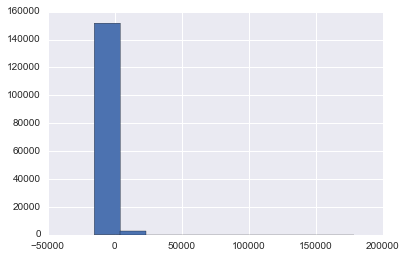

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(CVG.Extended_Net_Sales)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
CVG['Std_Sales'] = scaler.fit_transform(CVG.Extended_Net_Sales)

/Users/GS7271/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/GS7271/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(array([  1.51707000e+05,   2.99000000e+03,   7.70000000e+01,
          2.30000000e+01,   1.20000000e+01,   9.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([ -7.66612271,   1.63161915,  10.929361  ,  20.22710286,
         29.52484472,  38.82258657,  48.12032843,  57.41807029,
         66.71581214,  76.013554  ,  85.31129586]),
 <a list of 10 Patch objects>)

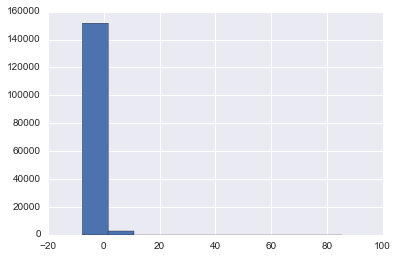

In [43]:
plt.hist(CVG.Std_Sales)

In [60]:
df = CVG[['Order', 'Item', 'Std_Sales']]
print(df.shape)

(154827, 3)


In [45]:
from os import path
import graphlab as gl
from datetime import datetime

In [48]:
data_gl = gl.SFrame(df)

In [59]:
rare_items = data_gl.groupby('Item', gl.aggregate.COUNT).sort('Count')
rare_items.tail()

Item,Count
314586,399
160576,401
AMA213AMS-7276,403
278831,463
167468,486
VMCVC33A1,545
372321,602
372320,619
243718,704
190190,1245


In [61]:
rare_items = rare_items[rare_items['Count'] <= 50]
data_gl = data_gl.filter_by(rare_items['Item'], 'Item', exclude = True)

In [62]:
print(data_gl.shape)

(48492, 3)


In [63]:
model = gl.recommender.create(data_gl, 
                              user_id = "Order", 
                              item_id = "Item", 
                              target = "Std_Sales")
results = model.recommend(users = None, k = 15)
model.save("order_item")

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 48492 observations with 28405 users and 423 items.

Data prepared in: 0.093565s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 48492 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | 0.275569                                 |

| 4       | 0.195312          | 0.216788                                 |

| 5       | 0.0976562         | 0.257973                                 |

| 6       | 0.0488281         | 0.281762                                 |

| 7       | 0.0244141         | 0.306029                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.195312          | 0.216788                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 90us         | 0.3721            | 0.435596              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 37.592ms     | 0.372652          | 0.472534              | 0.195312    |

| 2       | 66.869ms     | 0.356471          | 0.45612               | 0.116134    |

| 3       | 100.783ms    | 0.300725          | 0.400344              | 0.0856819   |

| 4       | 132.844ms    | 0.268115          | 0.367449              | 0.0580668   |

| 5       | 166.138ms    | 0.227748          | 0.312428              | 0.0491185   |

| 6       | 197.225ms    | 0.198959          | 0.270932              | 0.042841    |

| 11      | 348.686ms    | 0.151553          | 0.202923              | 0.0271912   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.113459

Final training RMSE: 0.166159

recommendations finished on 1000/28405 queries. users per second: 169837

recommendations finished on 2000/28405 queries. users per second: 158567

recommendations finished on 3000/28405 queries. users per second: 146980

recommendations finished on 4000/28405 queries. users per second: 143709

recommendations finished on 5000/28405 queries. users per second: 138935

recommendations finished on 6000/28405 queries. users per second: 137250

recommendations finished on 7000/28405 queries. users per second: 140862

recommendations finished on 8000/28405 queries. users per second: 140959

recommendations finished on 9000/28405 queries. users per second: 141163

recommendations finished on 10000/28405 queries. users per second: 139852

recommendations finished on 11000/28405 queries. users per second: 138840

recommendations finished on 12000/28405 queries. users per second: 136345

recommendations finished on 13000/28405 queries. users per second: 135773

recommendations finished on 14000/28405 queries. users per second: 134757

recommendations finished on 15000/28405 queries. users per second: 134633

recommendations finished on 16000/28405 queries. users per second: 135522

recommendations finished on 17000/28405 queries. users per second: 134814

recommendations finished on 18000/28405 queries. users per second: 133734

recommendations finished on 19000/28405 queries. users per second: 133394

recommendations finished on 20000/28405 queries. users per second: 134179

recommendations finished on 21000/28405 queries. users per second: 133230

recommendations finished on 22000/28405 queries. users per second: 134120

recommendations finished on 23000/28405 queries. users per second: 130199

recommendations finished on 24000/28405 queries. users per second: 130916

recommendations finished on 25000/28405 queries. users per second: 125027

recommendations finished on 26000/28405 queries. users per second: 118316

recommendations finished on 27000/28405 queries. users per second: 113716

recommendations finished on 28000/28405 queries. users per second: 109696

In [66]:
results.print_rows(30)

+---------+----------------+-----------------+------+
|  Order  |      Item      |      score      | rank |
+---------+----------------+-----------------+------+
| A095963 |     167468     | -0.140059113687 |  1   |
| A095963 |    THOSPB-8    | -0.171666830963 |  2   |
| A095963 |   245546ASSY   | -0.185987264102 |  3   |
| A095963 |     193650     | -0.192872643655 |  4   |
| A095963 |     165246     | -0.215465605443 |  5   |
| A095963 |     243718     | -0.228964716381 |  6   |
| A095963 |     165408     | -0.234120041317 |  7   |
| A095963 |   167387INST   | -0.236875802463 |  8   |
| A095963 |     167129     | -0.240374535507 |  9   |
| A095963 |   WAD5144-21   | -0.243085757082 |  10  |
| A095963 |     190190     |  -0.24601900596 |  11  |
| A095963 |     167373     | -0.247224271482 |  12  |
| A095963 |    STDCF-16    | -0.247658550924 |  13  |
| A095963 |    CMC27525    | -0.249095380491 |  14  |
| A095963 |     254197     | -0.250906586832 |  15  |
| A096139 |     190190     |

In [67]:
density= float(data_gl.shape[0])/float(len(pd.unique(data_gl['Order'])) * 
                                       len(pd.unique(data_gl['Item'])) * 
                                       len(pd.unique(data_gl['Std_Sales'])))
sparsity = 1 - density

print(sparsity)

0.999999772128


In [68]:
item_item = gl.recommender.item_similarity_recommender.create(data_gl, 
                                  user_id = "Order", 
                                  item_id = "Item", 
                                  target = "Std_Sales",
                                  only_top_k = 15,
                                  similarity_type = "cosine")

results = item_item.get_similar_items(k = 15)
results.head()

Recsys training: model = item_similarity

Preparing data set.

Data has 48492 observations with 28405 users and 423 items.

Data prepared in: 0.075215s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 7.823ms                        | 14         |

| 13.862ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 14.531ms                            | 0                | 0               |

| 29.001ms                            | 100              | 423             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.055986s

Item,similar,score,rank
254049,254153,0.120898663998,1
254049,220570,0.114174485207,2
254049,328571,0.0566236376762,3
254049,254038,0.0564288496971,4
254049,254044,0.0508647561073,5
254049,167125,0.0508454442024,6
254049,167124,0.0405848026276,7
254049,CHN50SK,0.0370730757713,8
254049,167130,0.0364674925804,9
254049,254197,0.0360285043716,10


In [71]:
export = results.to_dataframe()
export.to_csv('CVG_Item_recommender.csv', encoding = 'utf-8')